In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [211]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
pip install fasttext

In [163]:
import fasttext
from fasttext import load_model

In [164]:
train_dataset=pd.read_csv('../input/nlp-getting-started/train.csv')
test_dataset=pd.read_csv('../input/nlp-getting-started/test.csv')

In [165]:
train_dataset.shape

(7613, 5)

In [167]:
test_dataset.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

In [168]:
train_dataset.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [169]:
train_dataset.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [170]:
len(train_dataset.text.unique())

7503

In [171]:
train_dataset.keyword.unique()
len(train_dataset.keyword.unique())

222

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f761440aa90>]],
      dtype=object)

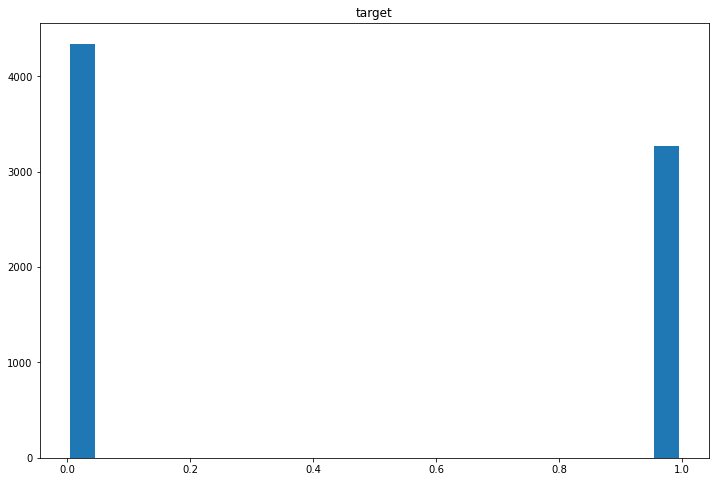

In [172]:
train_dataset.hist(column='target',bins=20,grid=False,figsize=(12,8),zorder=2,rwidth=0.8)

**Data Preprocessing Steps**

In [173]:
train_dataset['target'].mean()

0.4296597924602653

In [174]:
train_dataset.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [178]:
train_dataset['text'][:1]

0    our deeds are the reason of this #earthquake m...
Name: text, dtype: object

In [177]:
#lower casing the letters
train_dataset['text']=train_dataset['text'].str.lower()

In [179]:
#to remove the URL links
train_dataset['text']=train_dataset['text'].str.replace('http\S+|www.\S+', '', case=False)

In [205]:
train_dataset['text'][200]

'happening hatzolah ems ambulance responding dual sirens and'

In [204]:
#to remove the non-ascii characters
train_dataset['text']=train_dataset['text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [206]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [207]:
train_dataset['text']=train_dataset['text'].apply(remove_punctuations)

In [208]:
#removing the digits in the text
train_dataset['text']=train_dataset['text'].str.replace('\d+', '')

In [209]:
#tokenizing the text
train_dataset['text']=train_dataset.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [212]:
#removing stopwords
stopwords=stopwords.words('english')
train_dataset['text']=train_dataset['text'].apply(lambda x: ' '.join(word for word in x if word not in (stopwords)))

In [214]:
train_dataset.iloc[120]

id                                                        173
keyword                                            aftershock
location                                       Oshawa, Canada
text        wisdomwed bonus minute daily habits could real...
target                                                      0
Name: 120, dtype: object

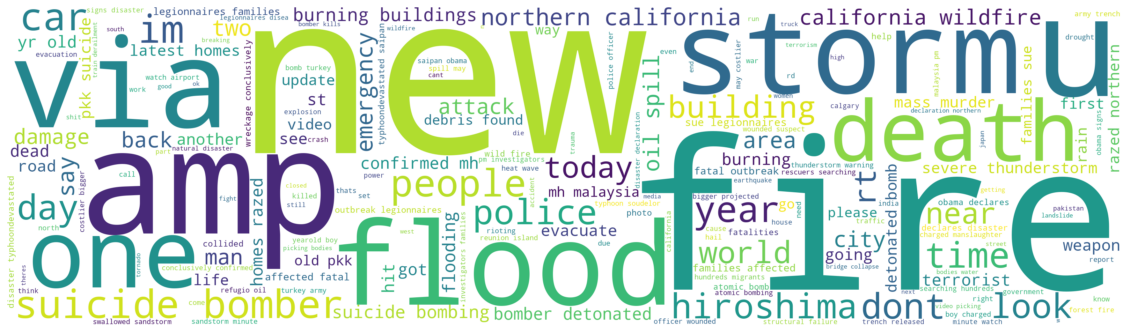

In [215]:
plt.figure(figsize=(20,8))
target = ' '.join(train_dataset[train_dataset['target']==1]['text'].to_list())
wordcloud = WordCloud(background_color="white",width=3500,height=1000).generate(target)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [216]:
X_train,X_test,y_train,y_test=train_test_split(train_dataset['text'],train_dataset['target'],random_state=0)

In [217]:
print(X_train.iloc[0],X_train.shape)
print(y_train.iloc[0],y_train.shape)
print(X_test.iloc[0],X_test.shape)

refugio oil spill may costlier bigger projected plains american pipeline oil spill (5709,)
1 (5709,)
katiekatcubs already know shit goes world series armageddon (1904,)


In [218]:
len(X_train)

5709

In [219]:
sample_submission=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [220]:
sample_submission.head

<bound method NDFrame.head of          id  target
0         0       0
1         2       0
2         3       0
3         9       0
4        11       0
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       0
3261  10874       0
3262  10875       0

[3263 rows x 2 columns]>

***FastText model***

In [221]:
with open('fasttext_train.txt', 'w') as f:
    for each_text, each_label in zip(X_train,y_train):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [222]:
with open('fasttext_validation.txt', 'w') as f:
    for each_text, each_label in zip(X_test,y_test):
        f.writelines(f'__label__{each_label} {each_text}\n')

In [223]:
model = fasttext.train_supervised('./fasttext_train.txt')

In [224]:
print(model.words[:10])

['</s>', 'like', 'im', 'amp', 'fire', 'get', 'new', 'via', 'dont', 'news']


In [225]:
print(model.labels)

['__label__0', '__label__1']


In [226]:
!head -n 5 ./fasttext_validation.txt

__label__0 katiekatcubs already know shit goes world series armageddon
__label__0 lemairelee danharmon people near meltdown comics free time wait line sunday nights representative sample
__label__0 tix calgary flames vs col avalanche preseason scotiabank saddledome
__label__0 ever think running choices life rembr theres kid choice wear suicide bomb vest
__label__0 dotish blight car go right ahead mine


In [227]:
def print_results(N, precision, recall):
    print("N\t" + str(N))
    print("Precision{}\t{:.3f}".format(2, precision))
    print("Recall{}\t{:.3f}".format(2, recall))

print_results(*model.test('./fasttext_validation.txt'))

N	1904
Precision2	0.806
Recall2	0.806


**Text Data Preprocessing**

In [228]:
#lower casing the letters
test_dataset['text']=test_dataset['text'].str.lower()

In [229]:
#to remove URL links
test_dataset['text']=test_dataset['text'].str.replace('http\S+|www.\S+', '', case=False)

In [230]:
test_dataset['text'][15]

"birmingham wholesale market is ablaze bbc news - fire breaks out at birmingham's wholesale market "

In [231]:
#to remove the non-ascii characters
test_dataset['text']=test_dataset['text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [232]:
#remove punctuations
test_dataset['text']=test_dataset['text'].apply(remove_punctuations)

In [233]:
#removing the digits in the text
test_dataset['text']=test_dataset['text'].str.replace('\d+', '')

In [234]:
#tokenizing the text
test_dataset['text']=test_dataset.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)

In [235]:
test_dataset['text'][4]

['typhoon', 'soudelor', 'kills', 'in', 'china', 'and', 'taiwan']

In [236]:
#removing stopwords
test_dataset['text']=test_dataset['text'].apply(lambda x: ' '.join(word for word in x if word not in (stopwords)))

In [237]:
test_dataset['text'][4]

'typhoon soudelor kills china taiwan'

In [238]:
#converting test file into text 

with open('fasttext_test.txt', 'w') as f:
    for text in zip(test_dataset['text']):
        f.writelines(f'{text}\n')

In [239]:
!head -n 5 ./fasttext_test.txt

('happened terrible car crash',)
('heard earthquake different cities stay safe everyone',)
('forest fire spot pond geese fleeing across street save',)
('apocalypse lighting spokane wildfires',)
('typhoon soudelor kills china taiwan',)


In [240]:
text_list=test_dataset['text'].tolist()

In [241]:
text_list[:10]

['happened terrible car crash',
 'heard earthquake different cities stay safe everyone',
 'forest fire spot pond geese fleeing across street save',
 'apocalypse lighting spokane wildfires',
 'typhoon soudelor kills china taiwan',
 'shakingits earthquake',
 'theyd probably still show life arsenal yesterday eh eh',
 'hey',
 'nice hat',
 'fuck']

In [242]:
test_predictions=model.predict(text_list)

In [243]:
test_predictions[0][1]

['__label__0']

In [244]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [245]:
len(test_predictions[0])

3263

In [246]:
sample_submission['id']=test_dataset['id']

In [247]:
sample_submission['target']=0

In [248]:
sample_submission['target'][3]

0

In [249]:
for i in range(len(test_predictions[0])):
    text=str(test_predictions[0][i]).replace('[','').replace(']','')
    sample_submission['target'][i]=int(''.join(c for c in text if c.isdigit()))

In [250]:
sample_submission.head

<bound method NDFrame.head of          id  target
0         0       1
1         2       0
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]>

In [ ]:
sample_submission.to_csv('nlp_submission_7.csv',index=False)